In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. The Data

In [2]:
pwd

'/Users/Rhys/Desktop/PGA Project'

In [3]:
# Load data

df = pd.read_csv('/Users/Rhys/Desktop/PGA Project/pgaTourData.csv')

Player Name: Name of the golfer.

Rounds: The number of games that a player played.

Fairway Percentage: The percentage of time a tee shot lands on the fairway.

Year: The year in which the statistic was collected.

Avg Distance: The average distance of the tee-shot.

G.I.R: (Green in Regulation) is met if any part of the ball is touching the putting surface while the number of strokes taken is at least two fewer than par.

Average Putts: The average number of strokes taken on the green.

Average Scrambling: Scrambling is when a player misses the green in regulation, but still makes par or better on a hole.

Average Score: Average Score is the average of all the scores a player has played in that year.

Points: The number of FedExCup points a player earned in that year. These points can be earned by competing in tournaments.

Wins: The number of competition a player has won in that year.

Top 10: The number of competitions where a player has placed in the Top 10.

Average SG Putts: Strokes gained: putting measures how many strokes a player gains (or loses) on the greens.

Average SG Total: The Off-the-tee + approach-the-green + around-the-green + putting statistics combined.

SG:OTT: Strokes gained: off-the-tee measures player performance off the tee on all par-4s and par-5s.

SG:APR: Strokes gained: approach-the-green measures player performance on approach shots. Approach shots include all shots that are not from the tee on par-4 and par-5 holes and are not included in strokes gained: around-the-green and strokes gained: putting. Approach shots include tee shots on par-3s.

SG:ARG: Strokes gained: around-the-green measures player performance on any shot within 30 yards of the edge of the green. This statistic does not include any shots taken on the putting green.

Money: The amount of prize money a player has earned from tournaments.

In [4]:
#Examine Dataframe

df.head()

Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0  Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1     Ryan Armour   109.0               73.58  2018         283.5  68.22   
2     Chez Reavie    93.0               72.24  2018         286.5  68.67   
3      Ryan Moore    78.0               71.94  2018         289.2  68.80   
4    Brian Stuard   103.0               71.44  2018         278.9  67.12   

   Average Putts  Average Scrambling  Average Score Points  Wins  Top 10  \
0          29.93               60.67         69.617    868   NaN     5.0   
1          29.31               60.13         70.758  1,006   1.0     3.0   
2          29.12               62.27         70.432  1,020   NaN     3.0   
3          29.17               64.16         70.015    795   NaN     5.0   
4          29.11               59.23         71.038    421   NaN     3.0   

   Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG       Money  
0            -0.207             1.153   0.427   0.960  -0.027  $2,680,487  
1            -0.058             0.337  -0.012   0.213   0.194  $2,485,203  
2             0.192             0.674   0.183   0.437  -0.137  $2,700,018  
3            -0.271             0.941   0.406   0.532   0.273  $1,986,608  
4             0.164             0.062  -0.227   0.099   0.026  $1,089,763

In [5]:
df.rename(columns={'gir': 'G.I.R'}, inplace=True)

In [6]:
df.shape

(2312, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   G.I.R               1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

# 2. Data Cleaning

In [8]:
# 'Points' and 'Money' columns are of Dtype 'object' rather than numeric
# Upon inspection must remove commars and '$' signs and then convert to numeric

df['Points'] = df['Points'].str.replace(',','').astype(float)
df['Money'] = df['Money'].str.replace(',','').str.replace('$','').astype(float)

In [9]:
# 'Points', 'Money', Wins', and 'Top 10' contain NaNs, convert these to 0's

df['Wins'] = df['Wins'].fillna(0).astype(int)
df['Top 10'] = df['Top 10'].fillna(0).astype(int)
df['Points'] = df['Points'].fillna(0)
df['Money'] = df['Money'].fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   G.I.R               1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2312 non-null   float64
 10  Wins                2312 non-null   int64  
 11  Top 10              2312 non-null   int64  
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [11]:
df['Points'] = df['Points'].astype(int)

In [12]:
# As most of our features contain only 1678 with only 6 containing the full 2312 we will drop rows containing NaN's

df.dropna(axis = 0, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1678 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   G.I.R               1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              1678 non-null   int64  
 10  Wins                1678 non-null   int64  
 11  Top 10              1678 non-null   int64  
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [14]:
df['Rounds'] = df['Rounds'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1678 non-null   object 
 1   Rounds              1678 non-null   int64  
 2   Fairway Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   G.I.R               1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              1678 non-null   int64  
 10  Wins                1678 non-null   int64  
 11  Top 10              1678 non-null   int64  
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

# 3. Exploratory Data Analysis

In [16]:
# Check some summary stats

df.describe()

Rounds  Fairway Percentage         Year  Avg Distance  \
count  1678.000000         1678.000000  1678.000000   1678.000000   
mean     78.711561           61.440560  2014.004768    290.807688   
std      14.274137            5.058845     2.608637      8.916631   
min      45.000000           43.020000  2010.000000    266.400000   
25%      69.000000           57.942500  2012.000000    284.900000   
50%      79.500000           61.430000  2014.000000    290.550000   
75%      89.000000           64.910000  2016.000000    296.400000   
max     120.000000           76.880000  2018.000000    319.700000   

             G.I.R  Average Putts  Average Scrambling  Average Score  \
count  1678.000000    1678.000000         1678.000000    1678.000000   
mean     65.661675      29.163331           58.115638      70.921961   
std       2.745411       0.518468            3.384769       0.698305   
min      53.540000      27.510000           44.010000      68.698000   
25%      63.830000      28.810000           55.900000      70.494250   
50%      65.790000      29.140000           58.275000      70.902000   
75%      67.580000      29.520000           60.420000      71.342750   
max      73.520000      31.000000           69.330000      74.400000   

            Points         Wins       Top 10  Average SG Putts  \
count  1678.000000  1678.000000  1678.000000       1678.000000   
mean    629.620977     0.206198     2.331943          0.025641   
std     453.247993     0.516083     2.061388          0.343787   
min       0.000000     0.000000     0.000000         -1.475000   
25%     321.000000     0.000000     1.000000         -0.187000   
50%     528.500000     0.000000     2.000000          0.040000   
75%     812.750000     0.000000     3.000000          0.257000   
max    4169.000000     5.000000    14.000000          1.130000   

       Average SG Total       SG:OTT       SG:APR       SG:ARG         Money  
count       1678.000000  1678.000000  1678.000000  1678.000000  1.678000e+03  
mean           0.148105     0.037759     0.065015     0.019974  1.485133e+06  
std            0.694923     0.379892     0.380952     0.223361  1.410520e+06  
min           -3.209000    -1.717000    -1.680000    -0.930000  0.000000e+00  
25%           -0.254750    -0.190250    -0.180750    -0.123000  5.637718e+05  
50%            0.147000     0.056000     0.081000     0.022000  1.037838e+06  
75%            0.568500     0.291500     0.314500     0.175000  1.887149e+06  
max            2.406000     1.485000     1.533000     0.660000  1.203046e+07

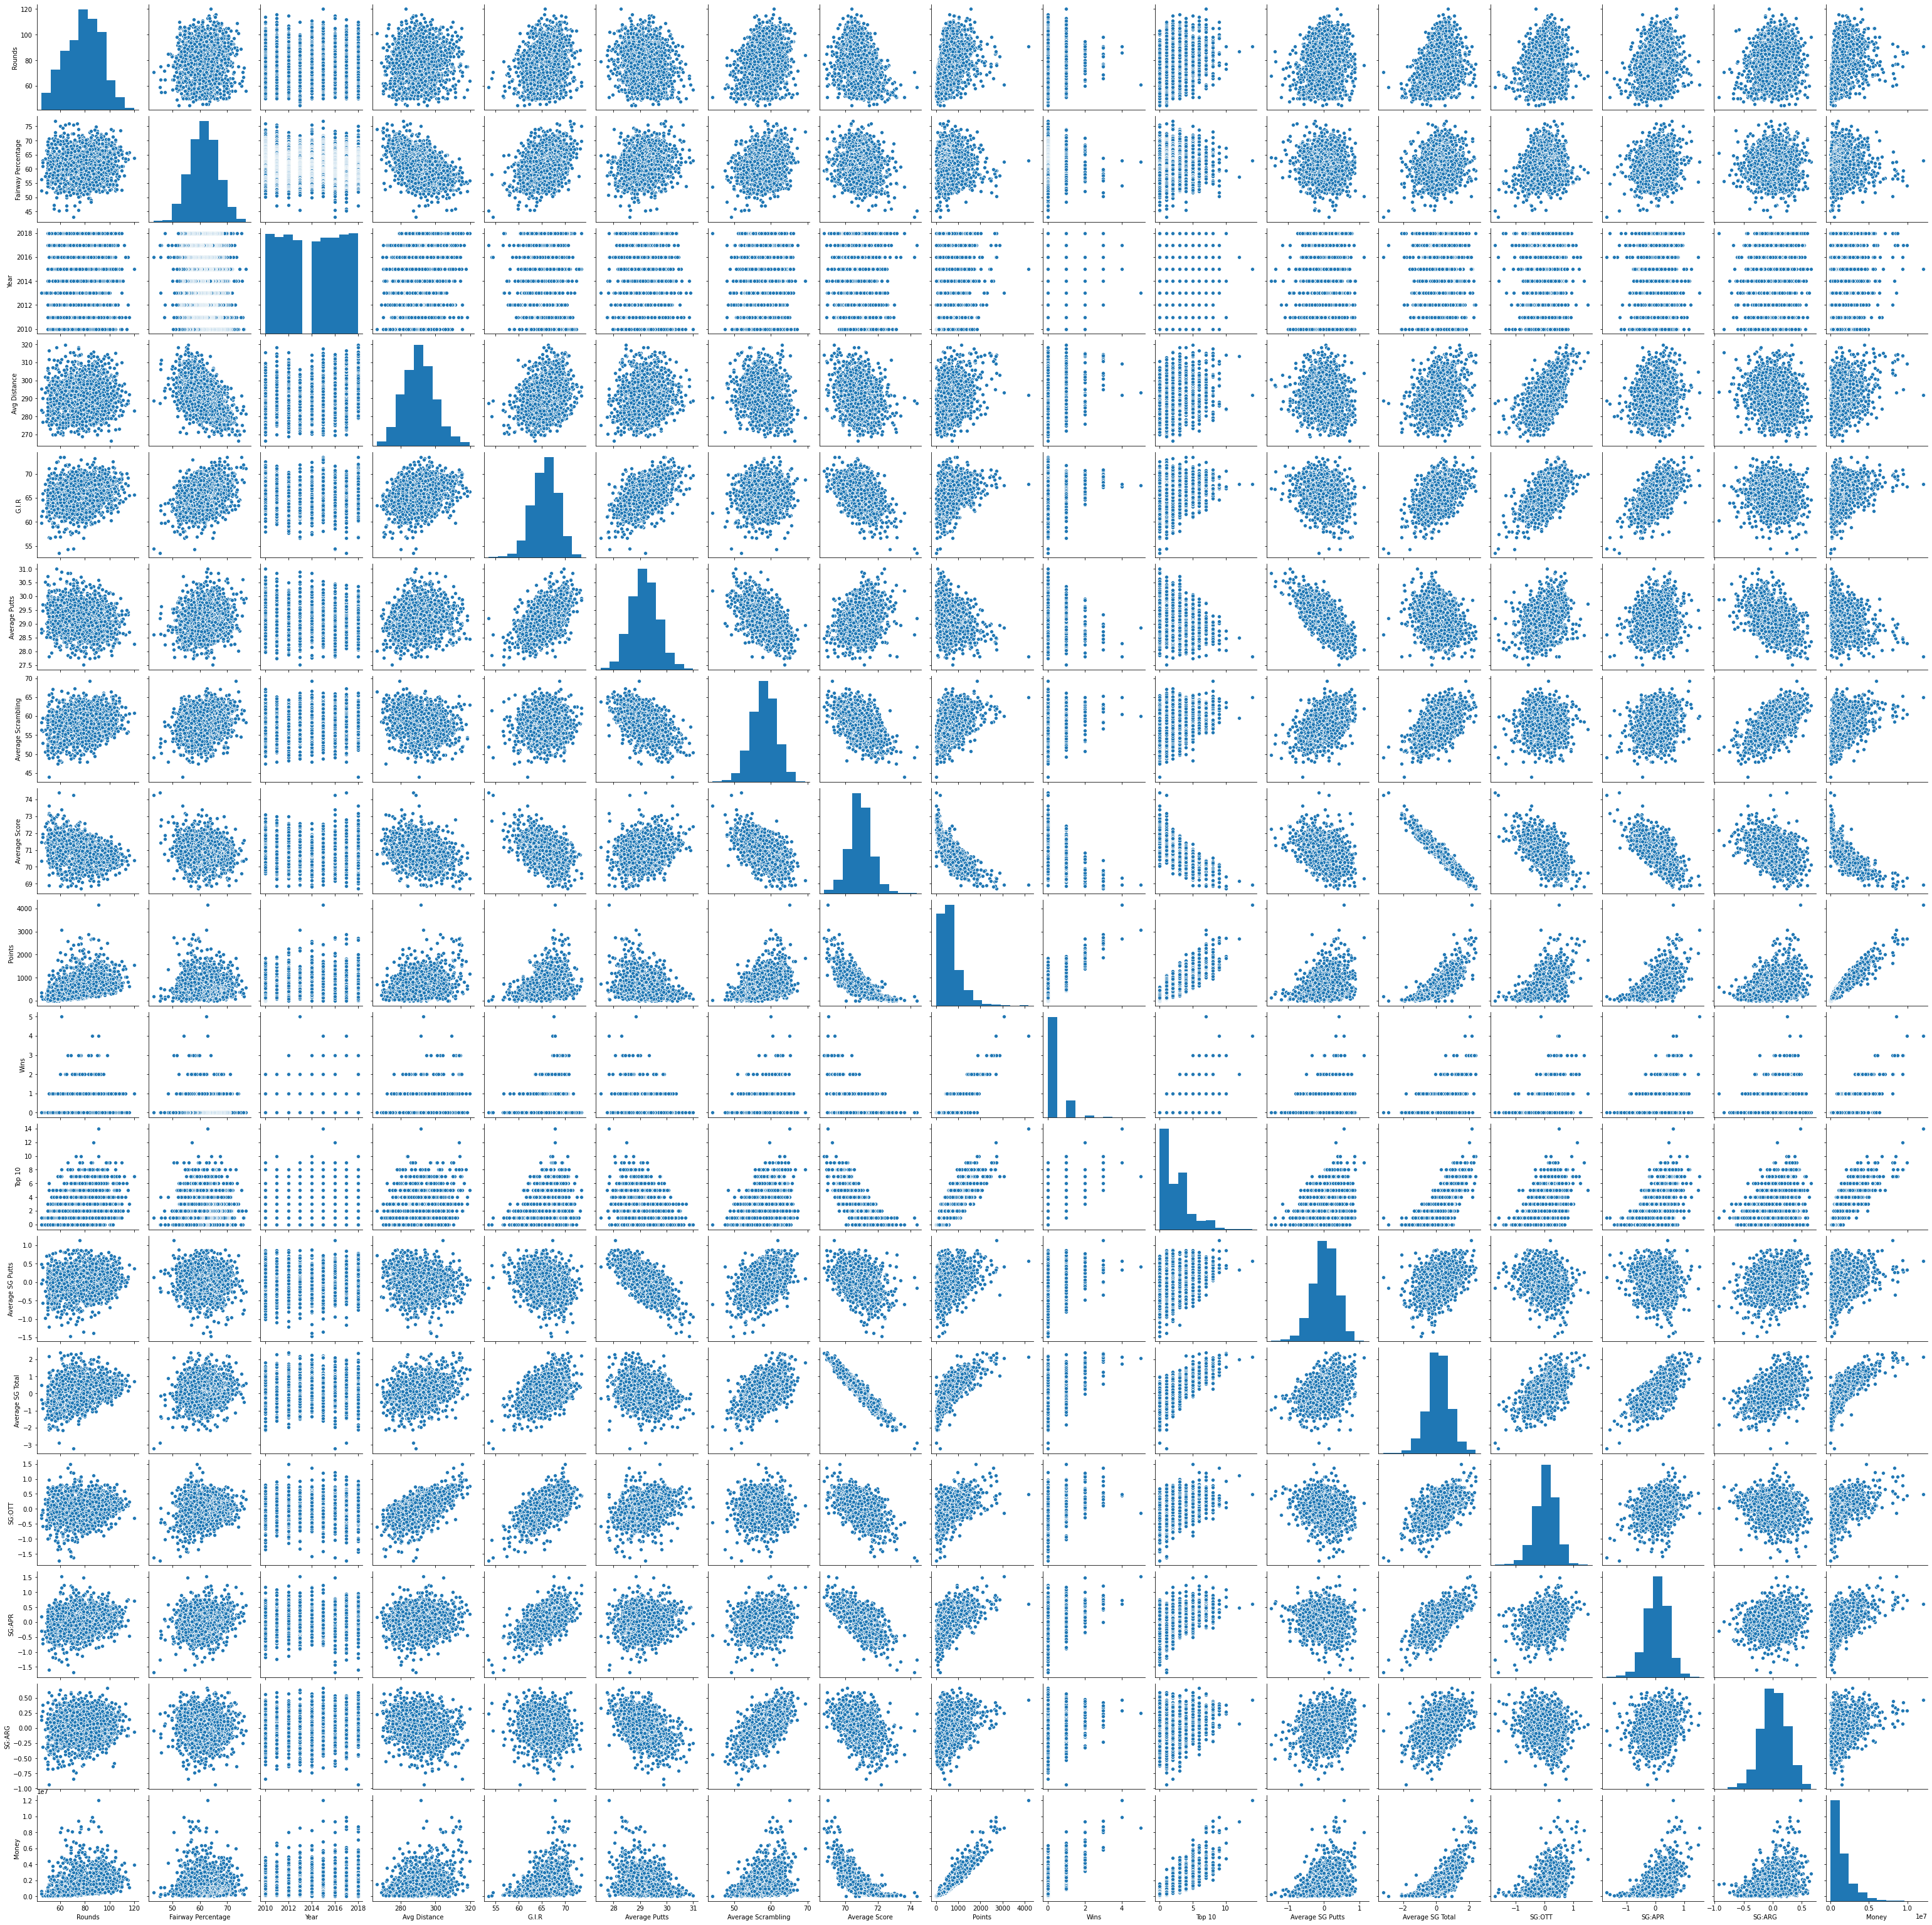

In [25]:
sns.pairplot(df)

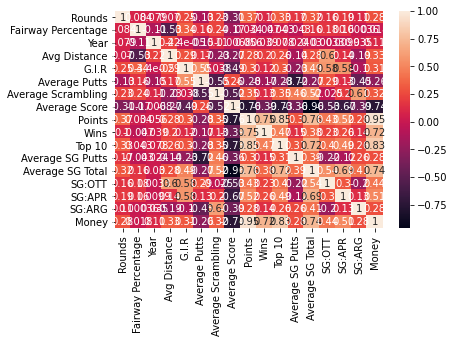

In [18]:
sns.heatmap(df.corr(), annot = True)

In [19]:
df.columns

Index(['Player Name', 'Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'G.I.R', 'Average Putts', 'Average Scrambling', 'Average Score',
       'Points', 'Wins', 'Top 10', 'Average SG Putts', 'Average SG Total',
       'SG:OTT', 'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')

In [20]:
features = ['Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'G.I.R', 'Average Putts', 'Average Scrambling', 'Average Score',
       'Points', 'Wins', 'Top 10', 'Average SG Putts', 'Average SG Total',
       'SG:OTT', 'SG:APR', 'SG:ARG', 'Money']

In [21]:
list(enumerate(features))

[(0, 'Rounds'),
 (1, 'Fairway Percentage'),
 (2, 'Year'),
 (3, 'Avg Distance'),
 (4, 'G.I.R'),
 (5, 'Average Putts'),
 (6, 'Average Scrambling'),
 (7, 'Average Score'),
 (8, 'Points'),
 (9, 'Wins'),
 (10, 'Top 10'),
 (11, 'Average SG Putts'),
 (12, 'Average SG Total'),
 (13, 'SG:OTT'),
 (14, 'SG:APR'),
 (15, 'SG:ARG'),
 (16, 'Money')]

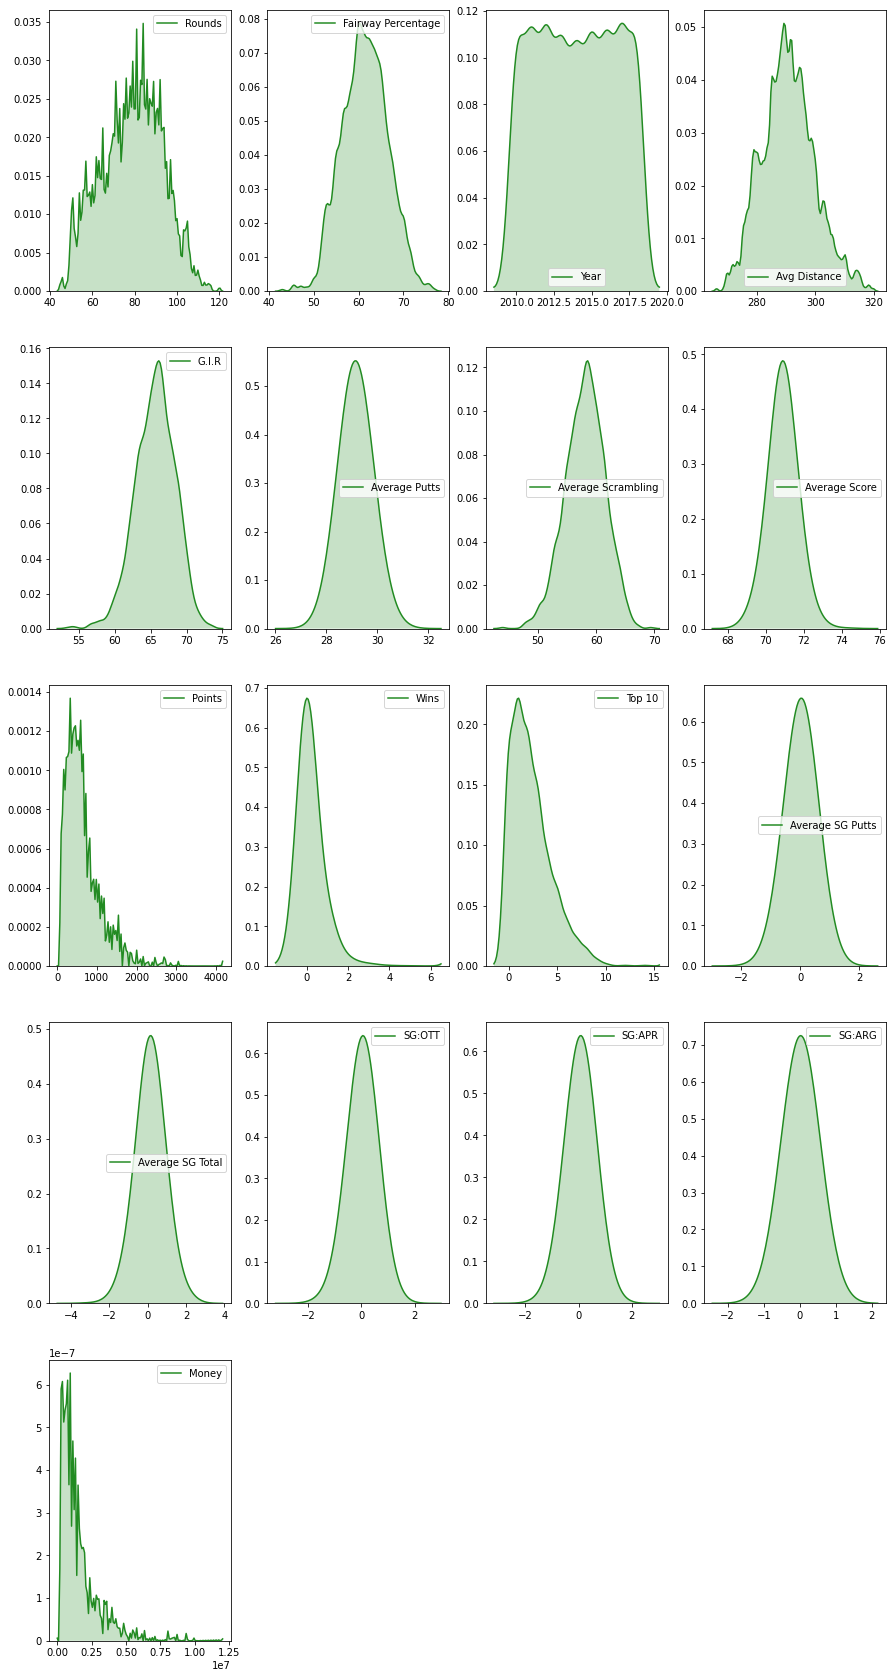

In [26]:
plt.figure(figsize=(15,30))
for i in enumerate(features):
    plt.subplot(5,4, i[0]+1)
    #sns.distplot(df[i[1]],kde = True, kde_kws={'bw': 0.8})
    sns.kdeplot(df[i[1]], shade=True, bw=.5, color='forestgreen')

In [ ]:
#Money, Top 10's, Wins, Points all long right tail. The rest appear normally

# 4. Models

### Linear Regression

In [34]:
#Import 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [40]:
X = df[['Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'G.I.R', 'Average Putts', 'Average Scrambling', 'Average Score', 
       'Average SG Putts', 'Average SG Total',
       'SG:OTT', 'SG:APR', 'SG:ARG',]]
y = df['Money']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

sc_X = StandardScaler()
X_train_SS = sc_X.fit_transform(X_train)
X_test_SS = sc_X.transform(X_test)

modelLR = LinearRegression()

# Fit the regressor to the training data
modelLR.fit(X_train_SS, y_train)

# Predict on the test data: y_pred
y_pred = modelLR.predict(X_test_SS)

# Compute and print R^2 and RMSE
print("R^2: {}".format(modelLR.score(X_test_SS, y_test)))

R^2: 0.5707964783566679


### Random Forest ensemble